# Title - Fitbit Time Series Project

# Goal
1.


Notes for intial data peeking:
1. Missing data 6/27/2018 - 7/6/2018
2. Most of the records are missing Food/ Food log information.  
> Available: May - June 1 record, October - November 7 records
3. Overall data range 4/26/2018 - 12/6/2018

Index - 
April, May, June, Aug, Sept, Oct, Nov: 36-67
July: 36-66
Dec: 36-45

Hypothesis
1. Missing value can be predicted with by similar days of the weeks (weekday/ weekend
2. Missing value can be affected by month/ season of the year
3. Explore: hypothesis testing, df.corr on 
'cal_burn', 'steps', 'distance', 'floors', 'min_sed'
'min_sed','min_active_light', 'min_active_fairly', 'min_active_very','cal_activity'
'cal_burn', 'cal_activity'


# Deliverables

1. Notebook: 
> material & methods, include data preparation, summary/ data dictionary
>
> 
>
> analyses
>
> conclusions
>
> predictions: 
>
> missing two weeks worth of data (csv file)
> 
> include comment about the individual who was wearing this fitness tracker

2. Prediction result: missing two weeks worth of data (csv file)

3. 2 slides, audience = a general audience. 
> Include at least one visualization, clearly labeled

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import acquire
#import prepare
#import summarize
#from acquire import get_store_data
#from prepare import prep_store_data, split_store_data
# from summarize import df_summary

# Acquisition

In [2]:
df = acquire.acquire()

In [3]:
df = acquire.handle_obj_type(df)

In [4]:
df = acquire.basic_clean(df)

Total length of df is: 225
Total length of none-repeating dates is: 225


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
cal_burn             225 non-null int64
steps                225 non-null int64
distance             225 non-null float64
floors               225 non-null int64
min_sed              225 non-null int64
min_active_light     225 non-null int64
min_active_fairly    225 non-null int64
min_active_very      225 non-null int64
cal_activity         225 non-null int64
dtypes: float64(1), int64(8)
memory usage: 17.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cal_burn,225.0,3401.911111,632.426578,799.0,3069.00,3385.00,3765.0,5199.0
steps,225.0,8536.186667,5255.746608,0.0,4714.00,7806.00,12380.0,25512.0
distance,225.0,4.046800,2.506253,0.0,2.22,3.68,5.9,12.0
floors,225.0,12.591111,25.844174,0.0,2.00,7.00,13.0,195.0
min_sed,225.0,809.520000,243.232639,28.0,654.00,750.00,877.0,1440.0
min_active_light,225.0,188.235556,75.170001,0.0,158.00,203.00,236.0,349.0
min_active_fairly,225.0,14.920000,15.363535,0.0,3.00,11.00,21.0,78.0
min_active_very,225.0,33.871111,37.195986,0.0,2.00,15.00,63.0,154.0
cal_activity,225.0,1484.546667,747.795790,0.0,1062.00,1481.00,1962.0,3596.0


In [7]:
train, test = acquire.split_date(df)

In [8]:
target_vars = train.columns.to_list()
train = train.resample('D')[target_vars].sum()

In [14]:
train['weekday'] = train.index.strftime('%a')
train.head()

,cal_burn,steps,distance,floors,min_sed,min_active_light,min_active_fairly,min_active_very,cal_activity,weekday
date,,,,,,,,,,
2018-07-16,4037,10551,4.98,4,714,204,51,47,2084,Mon
2018-07-17,3760,8377,3.95,12,646,258,8,25,1803,Tue
2018-07-18,3509,7504,3.54,4,754,222,20,3,1502,Wed
2018-07-19,3993,9484,4.47,4,1116,243,57,24,2093,Thu
2018-07-20,3110,6680,3.15,3,1262,136,28,14,1172,Fri


In [ ]:
flights.groupby('weekday').delay.mean().plot.bar(edgecolor='black', width=.9, figsize=(12, 7))
# flights.groupby(flights.index.weekday_name).delay.mean().plot.bar(edgecolor='black', width=.9, figsize=(12, 7))
plt.xticks(rotation=0)

**Takeaway**
- cal_burn: slightly more calaries burned in later part of the week
- steps & distance: similar tred, definitely more, begining from thursday
- floors: very similar throughout the week, spikes up on Sunday
- min_sed: begin to drop from Friday
- similar activity level (light, very and cal_activity)
- min_active_fairly: except for Monday, activity level rise thru the week

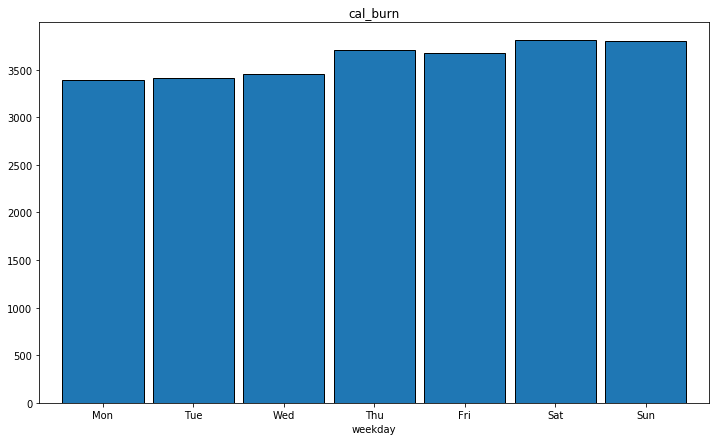

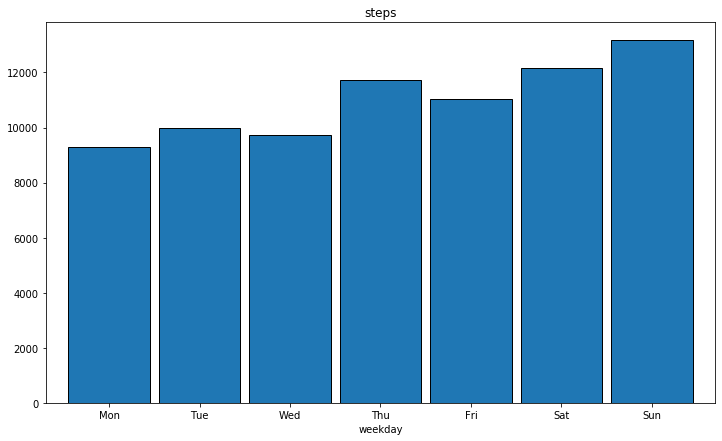

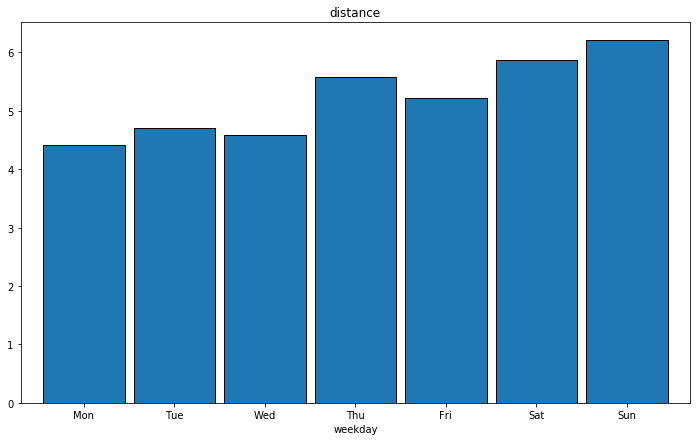

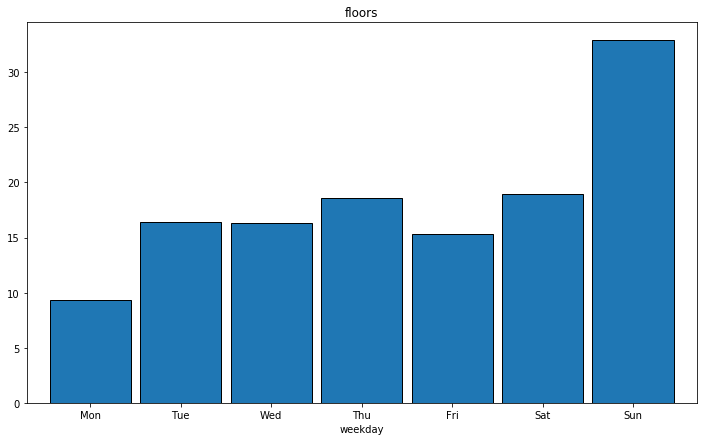

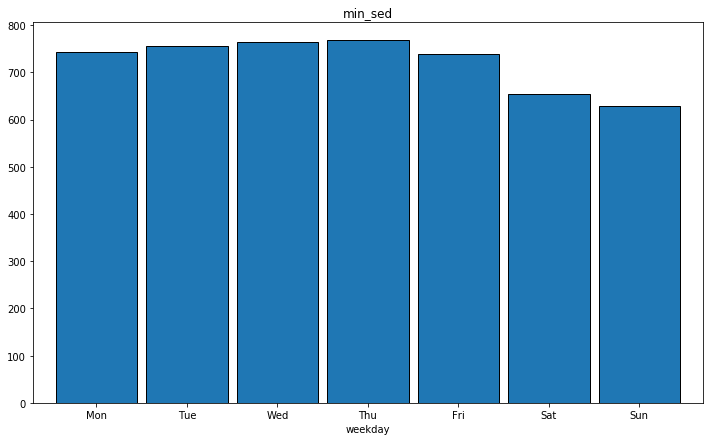

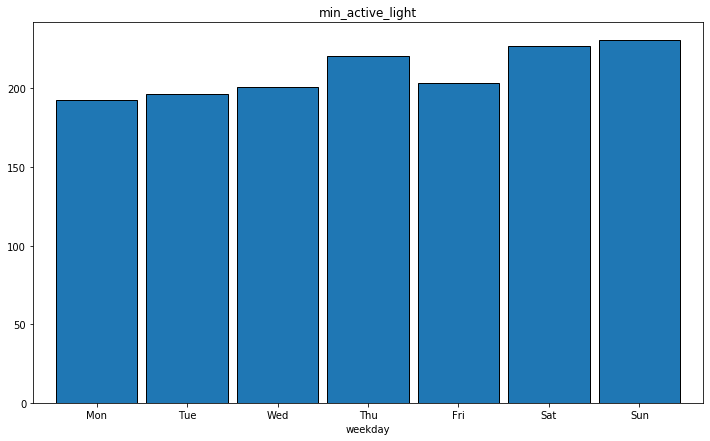

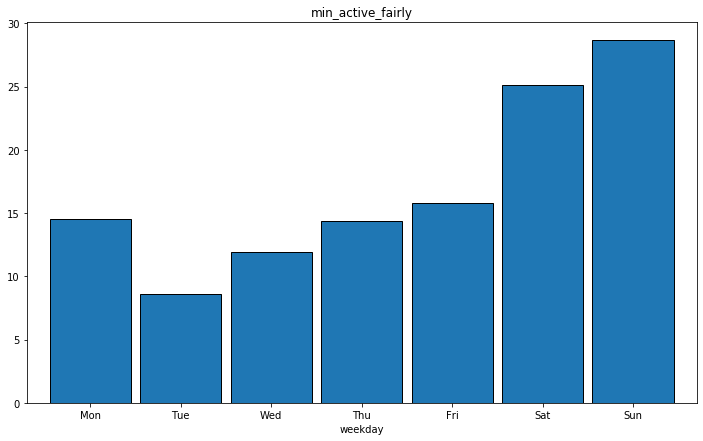

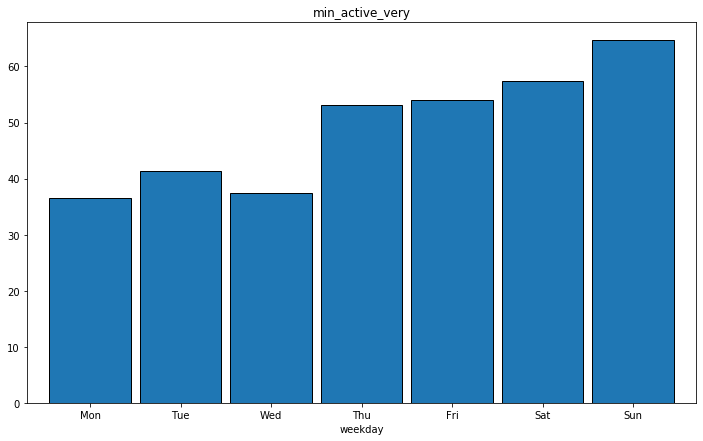

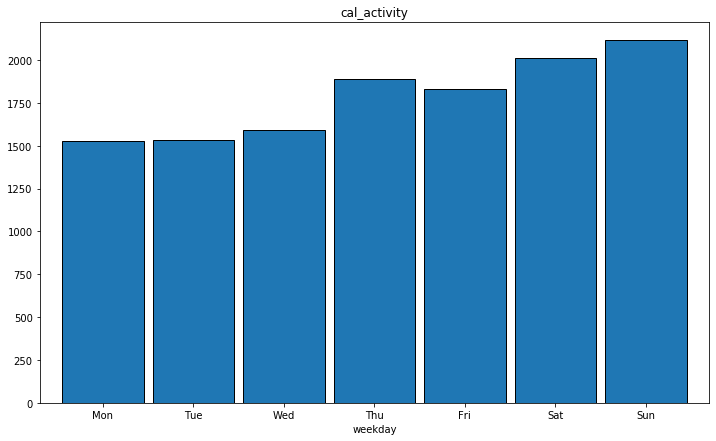

In [20]:
for var in target_vars:
    order = train.weekday.unique()
    #train.groupby('weekday')[var].mean().plot.bar(edgecolor='black', width=.9, figsize=(12, 7))
    train_weekday = train.groupby('weekday')[var].mean().reindex(order) 
    train_weekday.plot.bar(edgecolor='black', width=.9, figsize=(12, 7))
    plt.xticks(rotation=0)
    plt.title(var)
    plt.show()

In [70]:
train.index

DatetimeIndex(['2018-07-16', '2018-07-17', '2018-07-18', '2018-07-19',
               '2018-07-20', '2018-07-21', '2018-07-22', '2018-07-23',
               '2018-07-24', '2018-07-25',
               ...
               '2018-11-27', '2018-11-28', '2018-11-29', '2018-11-30',
               '2018-12-01', '2018-12-02', '2018-12-03', '2018-12-04',
               '2018-12-05', '2018-12-06'],
              dtype='datetime64[ns]', name='date', length=144, freq='D')

In [77]:
import calendar
import numpy as np
calendar.setfirstweekday(6)

def get_week_of_month(train):
    train = train.reset_index()
    wm = []
    for w in train.date:
        year = int(str(w).split('-')[0])
        month = int(str(w).split('-')[1])
        day = int(str(w).split('-')[2].split(' ')[0])
        x = np.array(calendar.monthcalendar(year, month))
        week_of_month = np.where(x==day)[0][0] + 1
        wm.append(week_of_month)
        #train['week_of_month'] = week_of_month
    return wm

In [78]:
wm = get_week_of_month(train)

In [80]:
train['week_of_day'] = wm

In [104]:
train[train.week_of_day == 6]

,cal_burn,steps,distance,floors,min_sed,min_active_light,min_active_fairly,min_active_very,cal_activity,weekday,week_of_day
date,,,,,,,,,,,
2018-09-30,4184,15991,7.54,9,652,254,45,72,2504,Sun,6


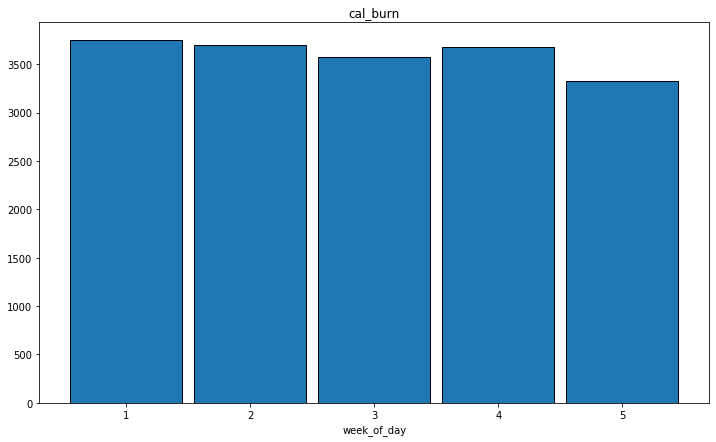

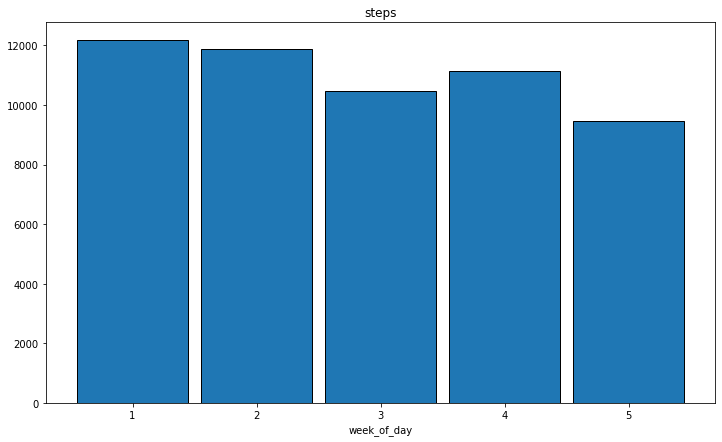

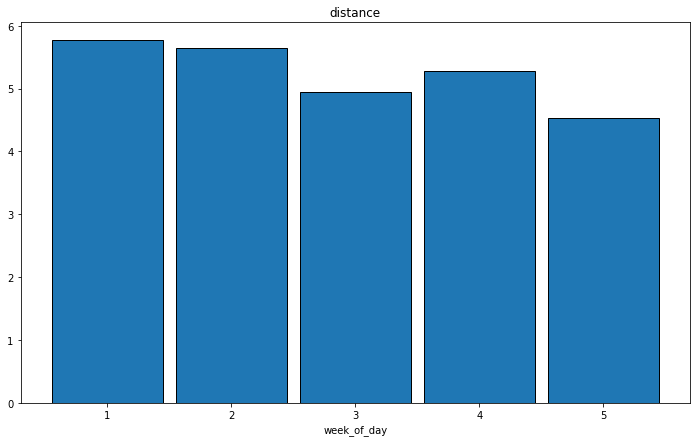

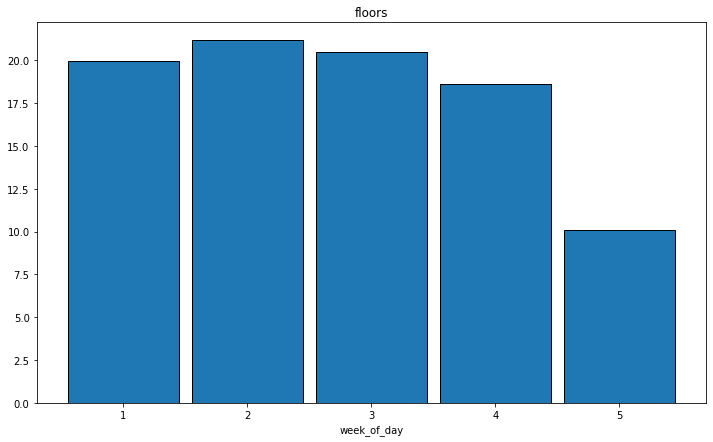

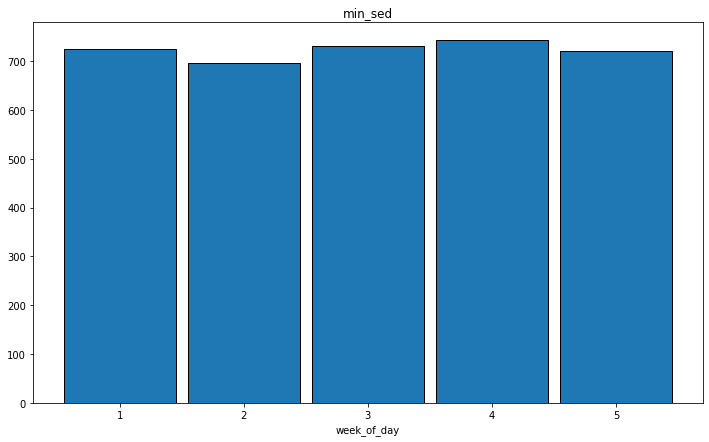

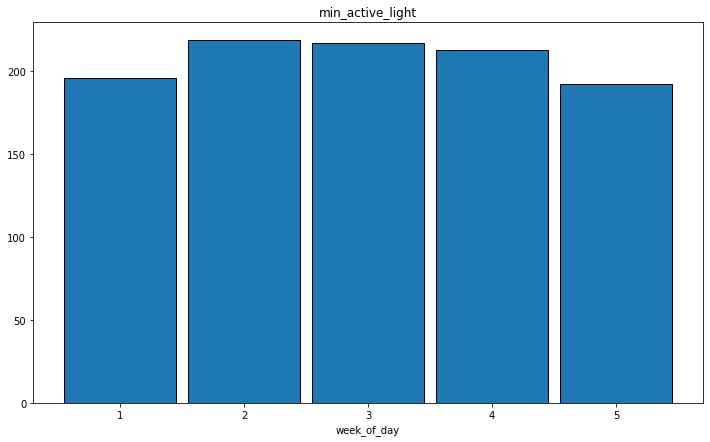

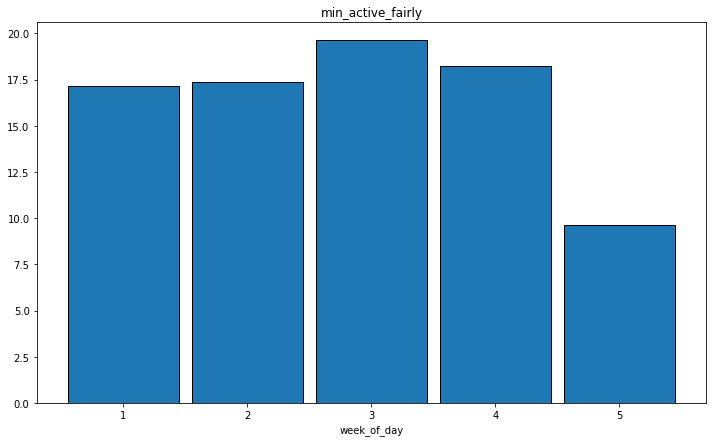

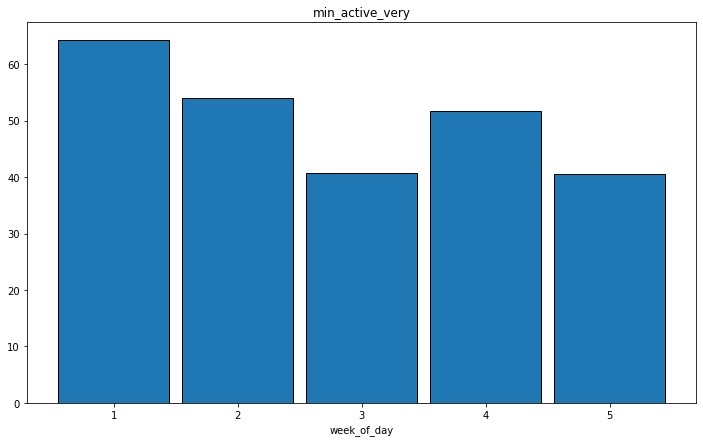

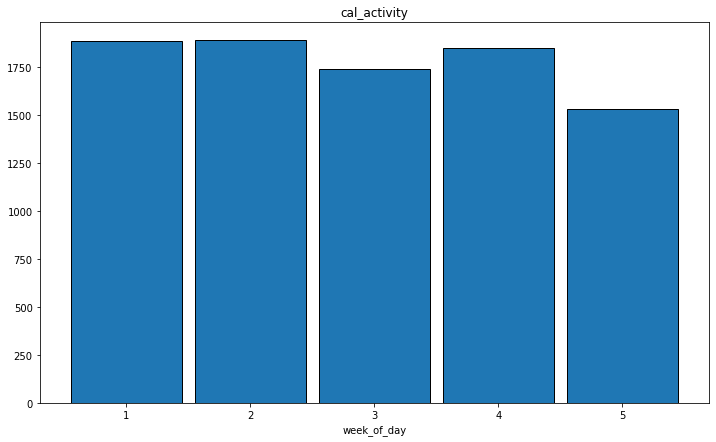

In [106]:
for var in target_vars:
    #order = ['1','2','3','4','5','6']
    #train.groupby('weekday')[var].mean().plot.bar(edgecolor='black', width=.9, figsize=(12, 7))
    train_wk = train[train.week_of_day != 6].groupby('week_of_day')[var].mean()
    #train_wk = train#.reindex(order) 
    train_wk.plot.bar(edgecolor='black', width=.9, figsize=(12, 7))
    plt.xticks(rotation=0)
    plt.title(var)
    plt.show()

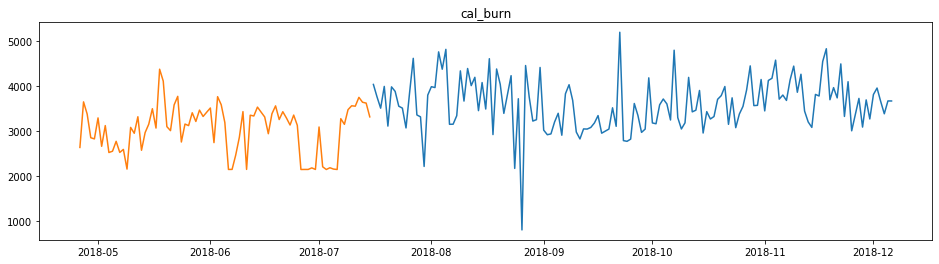

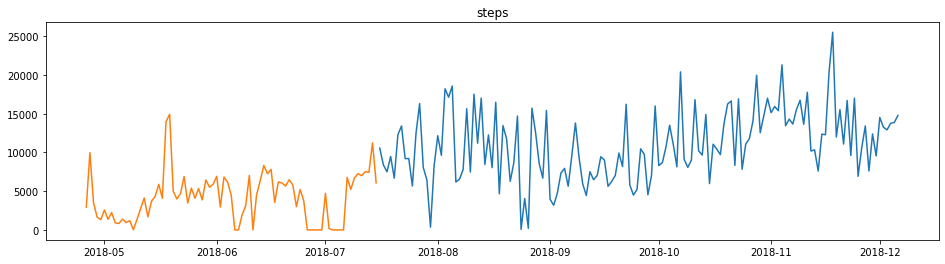

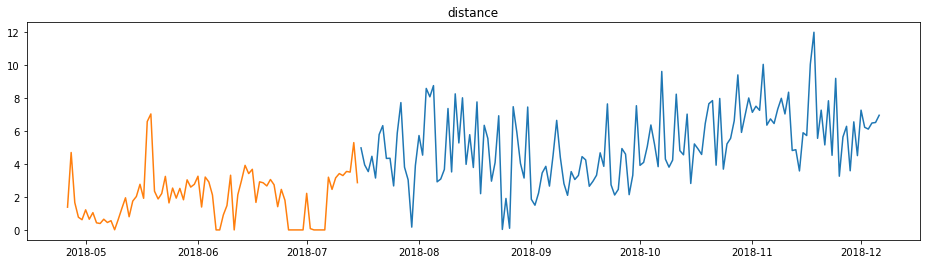

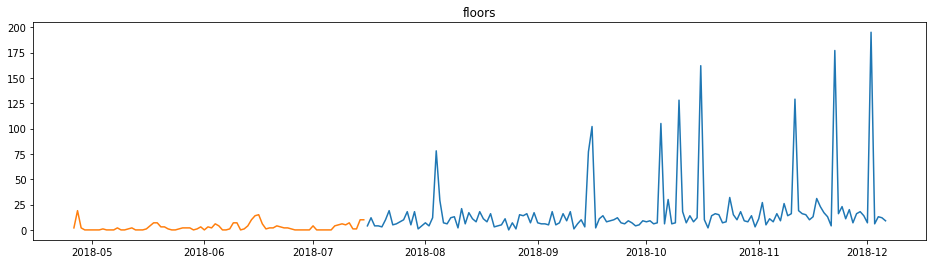

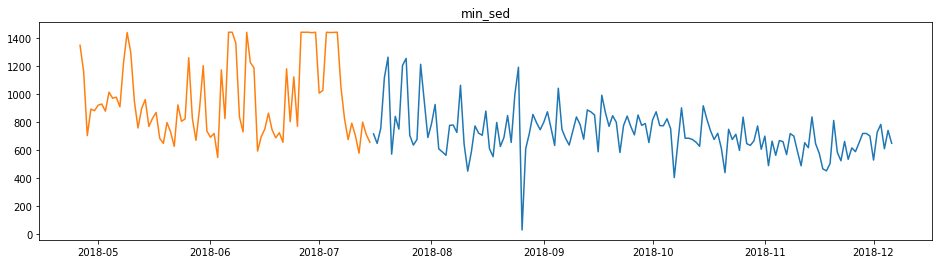

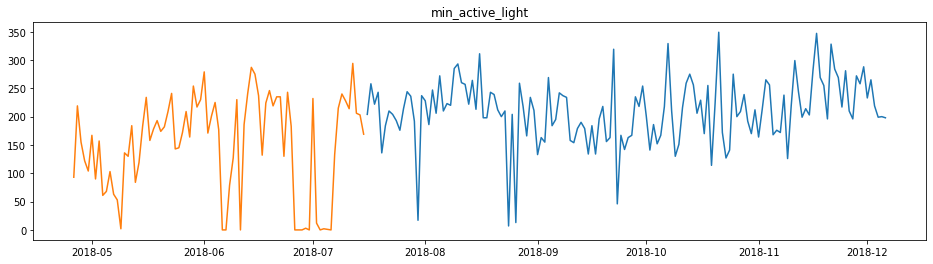

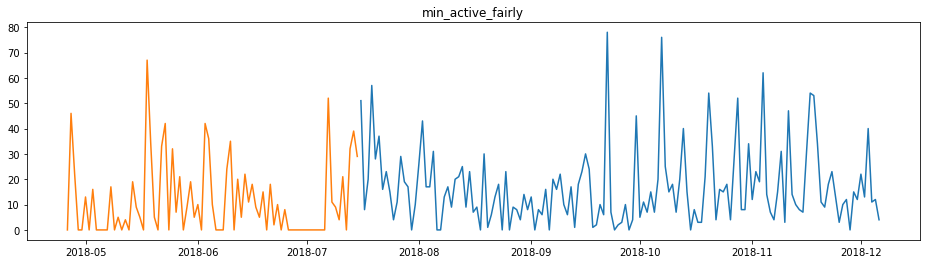

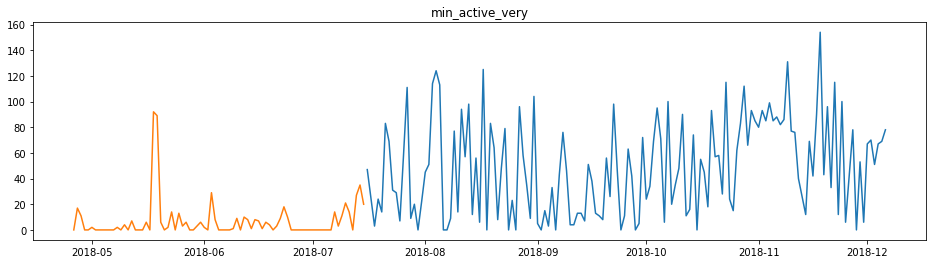

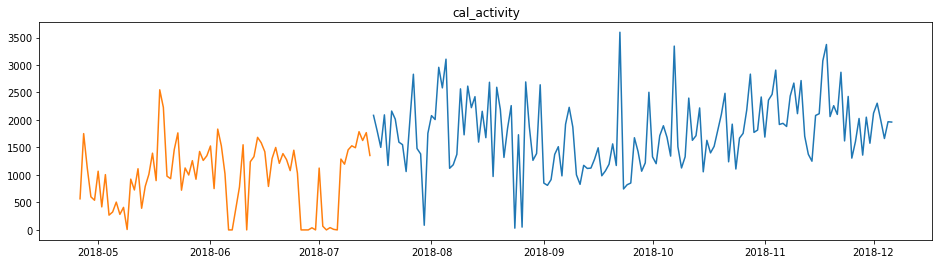

In [9]:
for var in target_vars:
    plt.figure(figsize=(16, 4))
    plt.plot(train[var])
    plt.plot(test[var])    
    plt.title(var)
    plt.show()

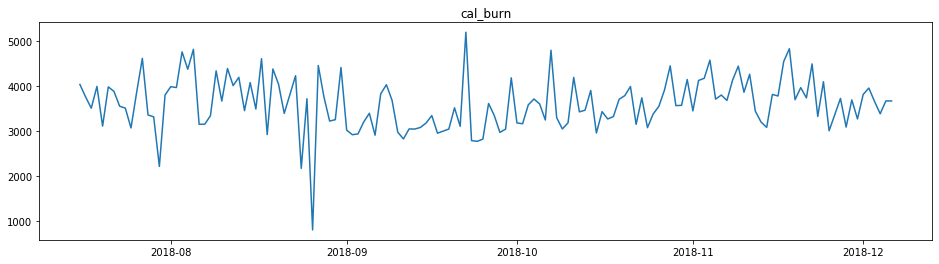

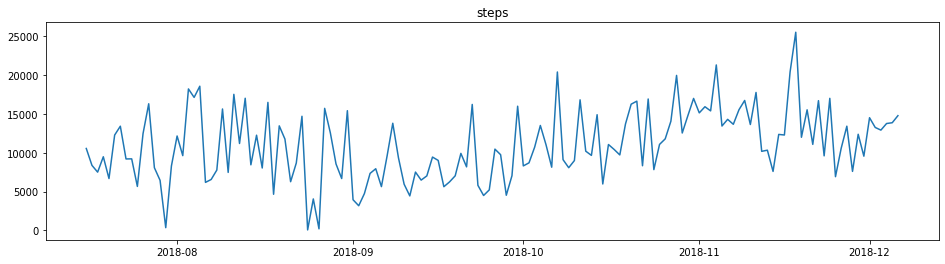

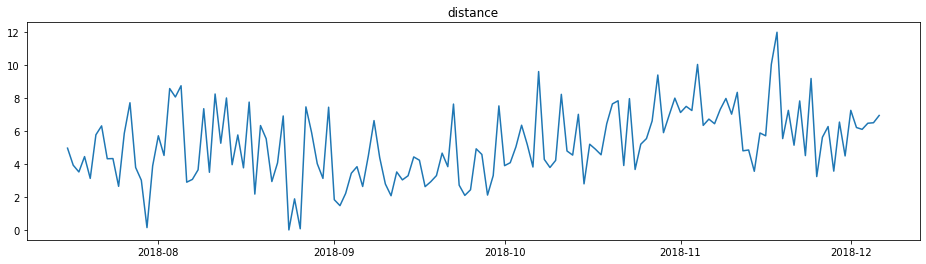

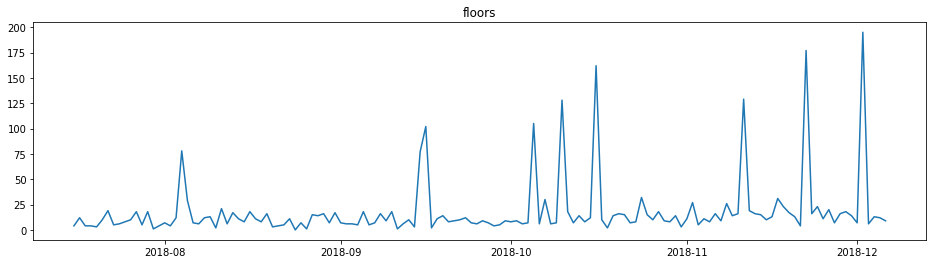

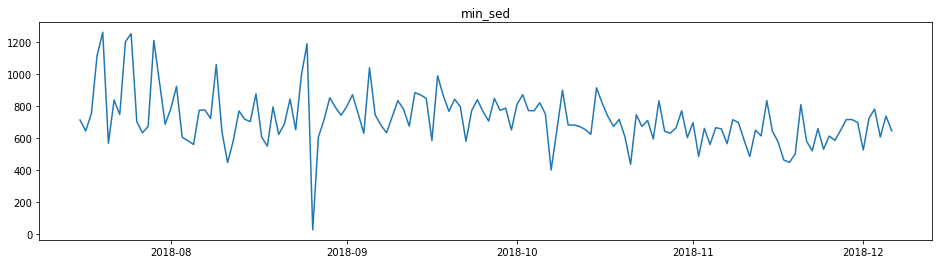

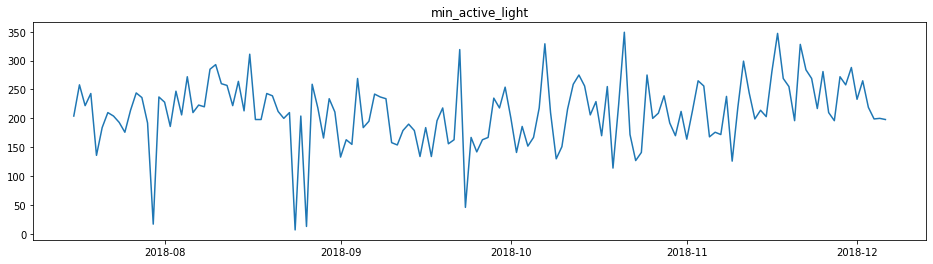

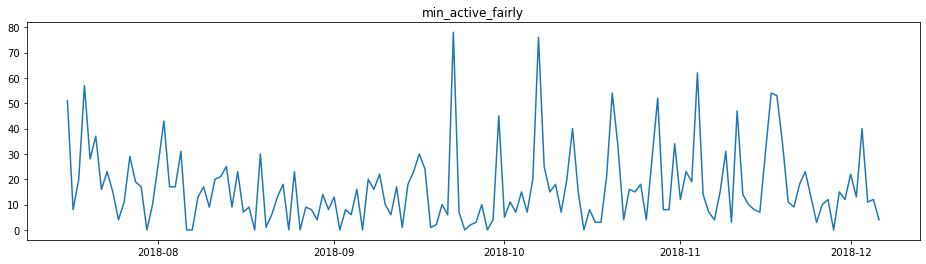

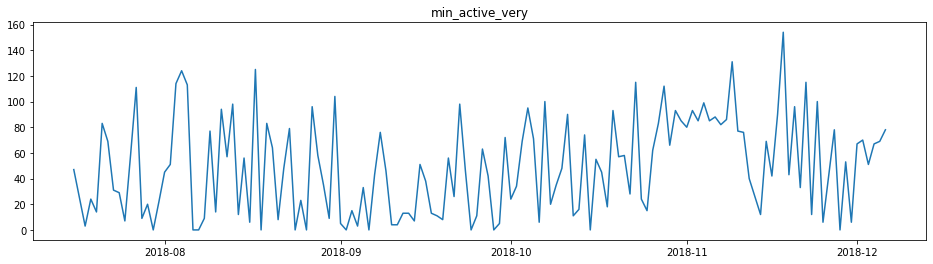

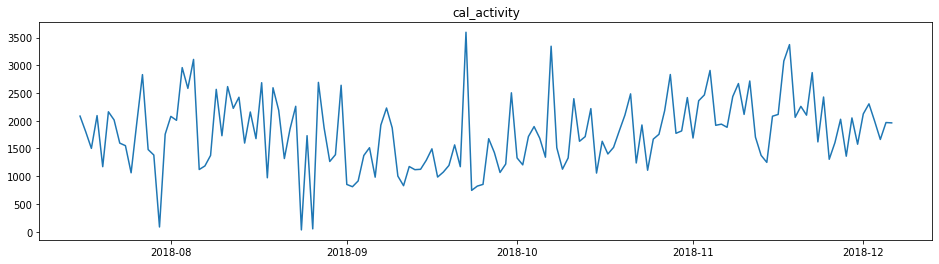

In [10]:
for var in target_vars:
    plt.figure(figsize=(16, 4))
    plt.plot(train[var])
    #plt.plot(test[var])    
    plt.title(var)
    plt.show()

In [11]:
train = train.resample('W')[target_vars].sum()

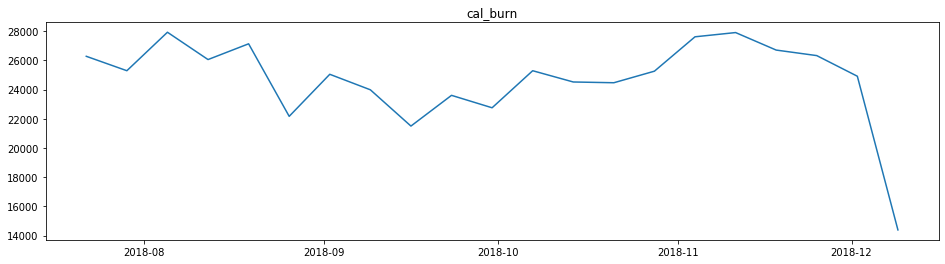

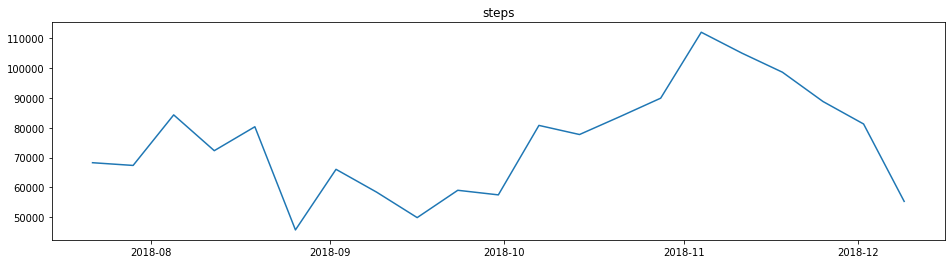

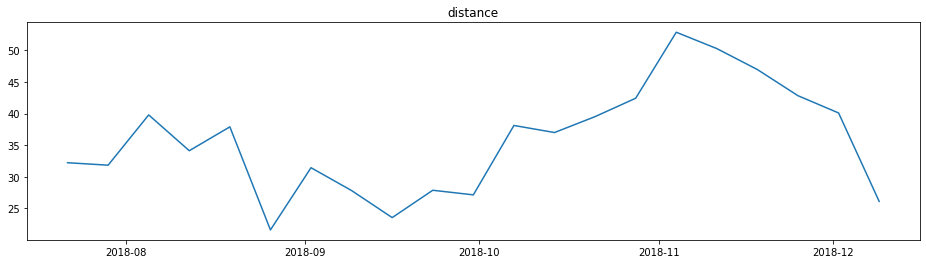

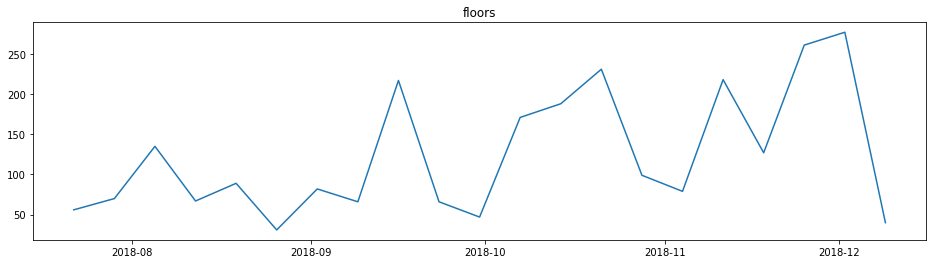

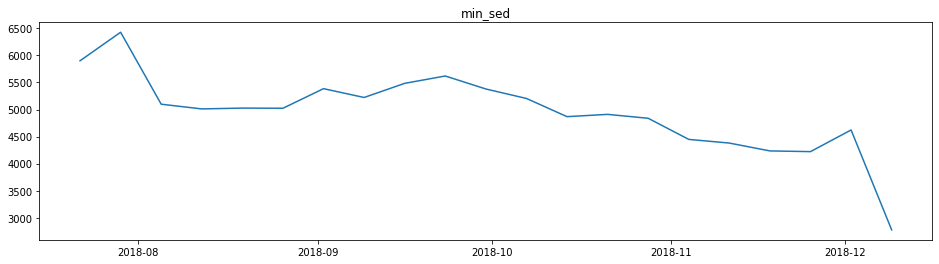

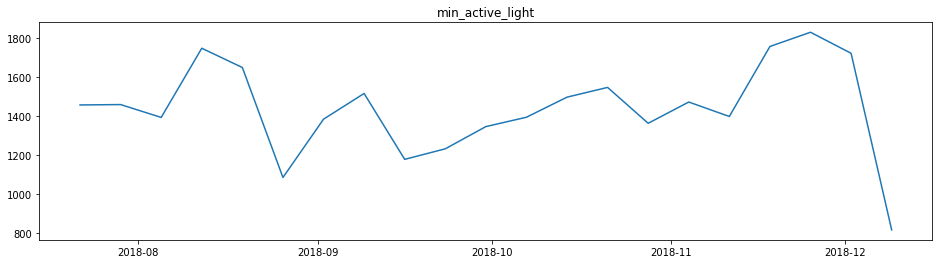

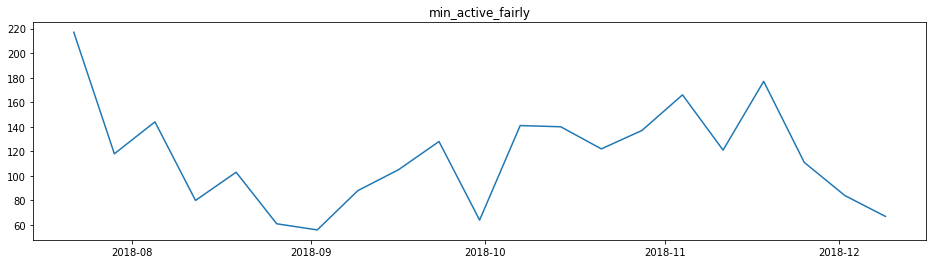

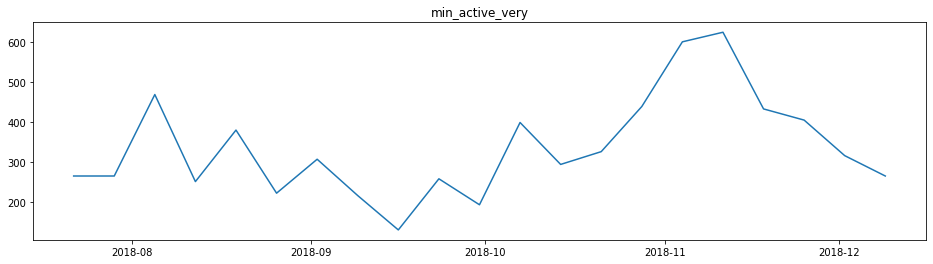

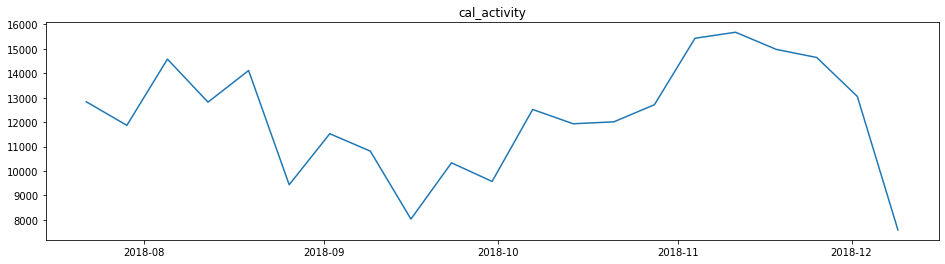

In [12]:
for var in target_vars:
    plt.figure(figsize=(16, 4))
    plt.plot(train[var])
    #plt.plot(test[var])    
    plt.title(var)
    plt.show()

In [13]:
train = train.resample('M')[target_vars].sum()

In [14]:
train

,cal_burn,steps,distance,floors,min_sed,min_active_light,min_active_fairly,min_active_very,cal_activity
date,,,,,,,,,
2018-07-31,51563,135673,64.03,126,12327,2916,335,530,24698
2018-08-31,103269,282776,133.35,322,20158,5875,388,1322,50941
2018-09-30,116870,290902,137.71,478,27088,6656,441,1104,50267
2018-10-31,99523,332301,157.03,689,19820,5801,540,1458,49168
2018-11-30,108537,404650,192.93,685,17285,6457,575,2064,60731
2018-12-31,39293,136608,66.18,317,7398,2538,151,581,20636


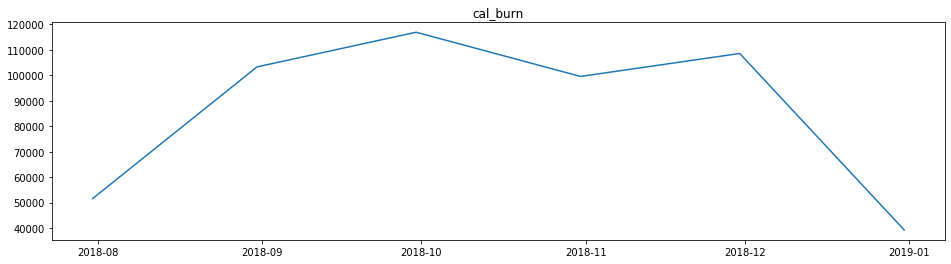

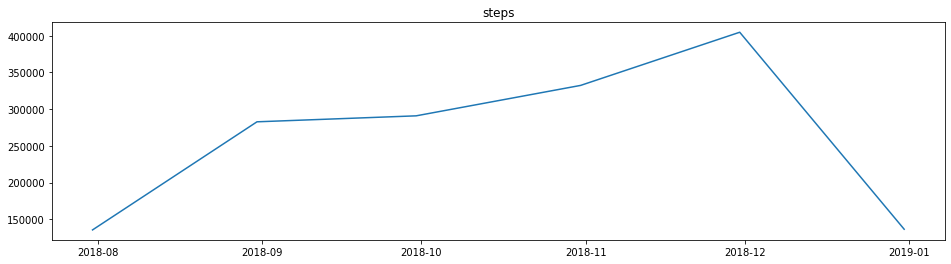

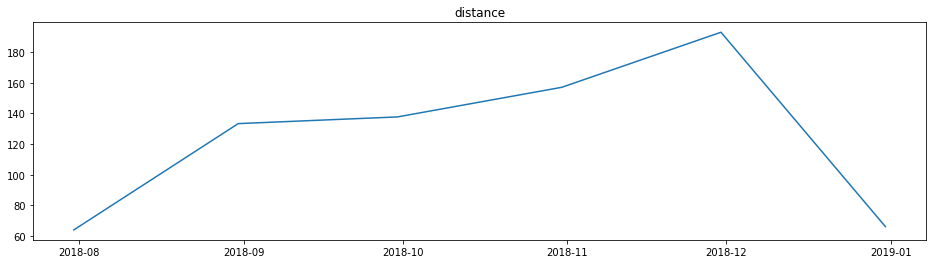

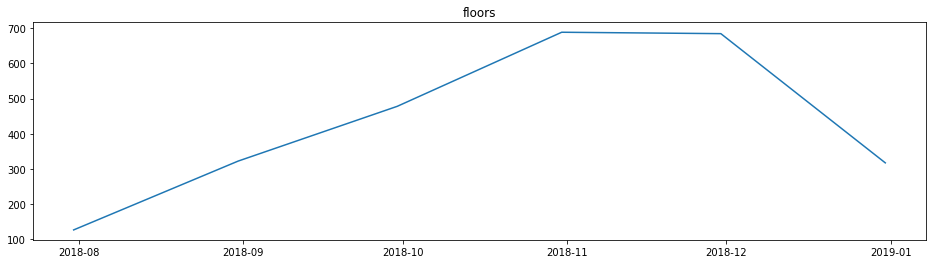

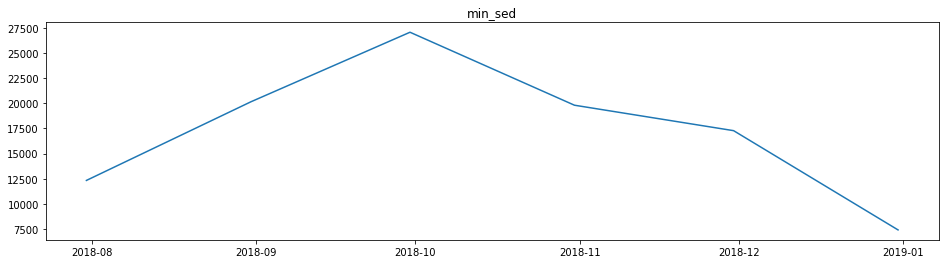

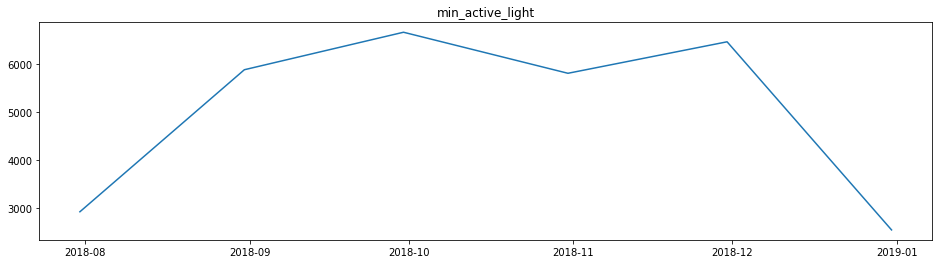

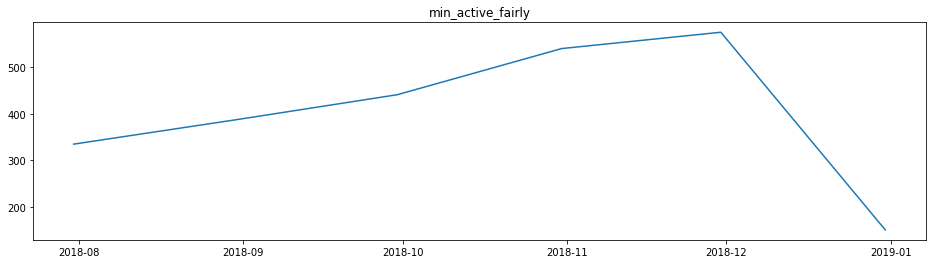

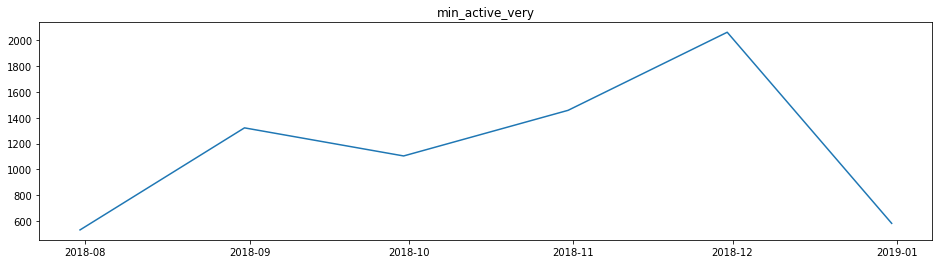

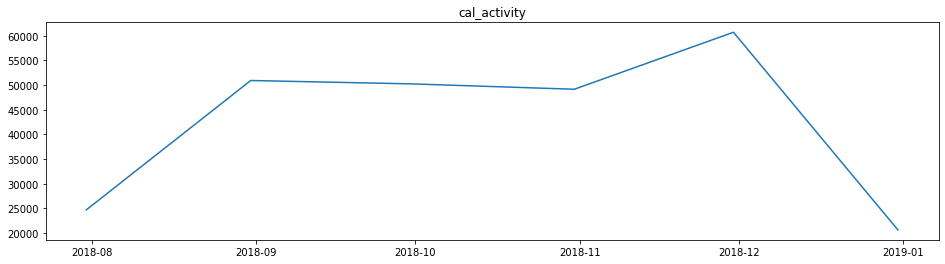

In [15]:
for var in target_vars:
    plt.figure(figsize=(16, 4))
    plt.plot(train[var])
    #plt.plot(test[var])    
    plt.title(var)
    plt.show()

1. Are there any day of the week where Armstrong is particularly more active or sedentary?

2. Do Armstrong have weekly patterns of activity?
3. During which months is Armstrong more/less active?

D
cal_burn


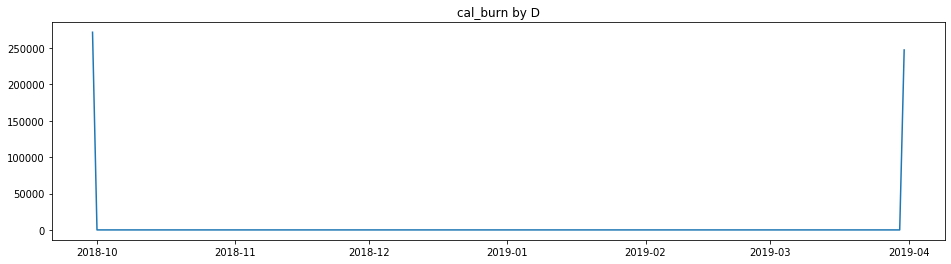

W
cal_burn


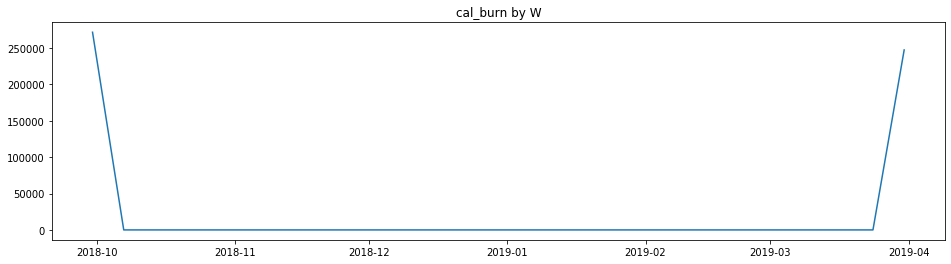

M
cal_burn


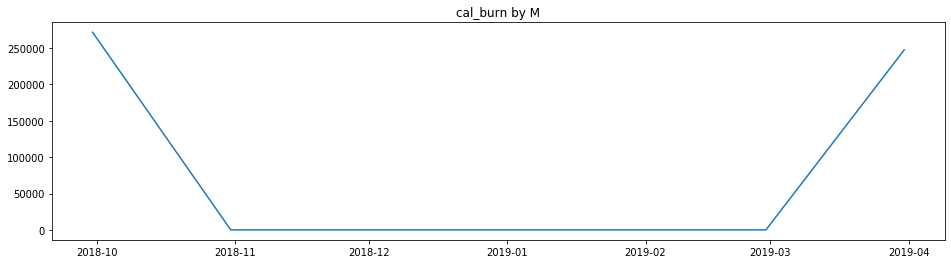

D
steps


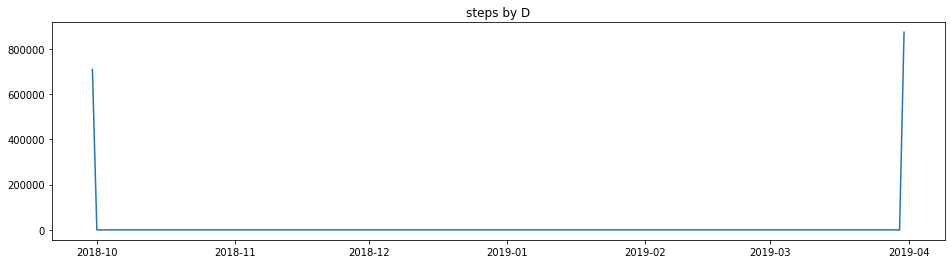

W
steps


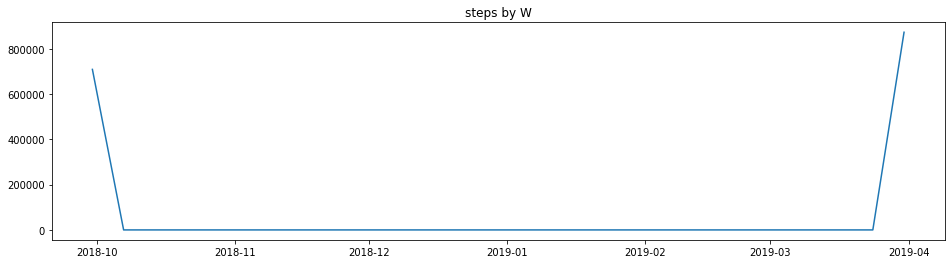

M
steps


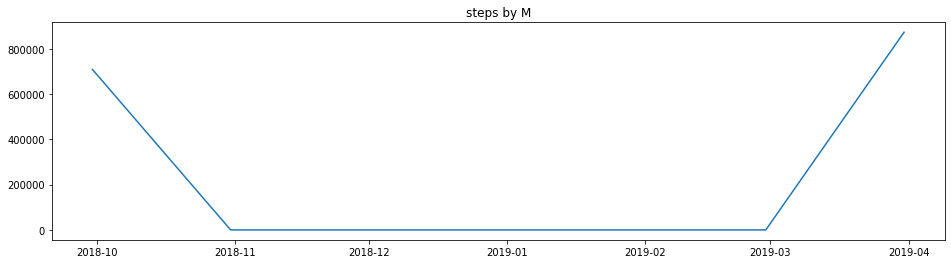

D
distance


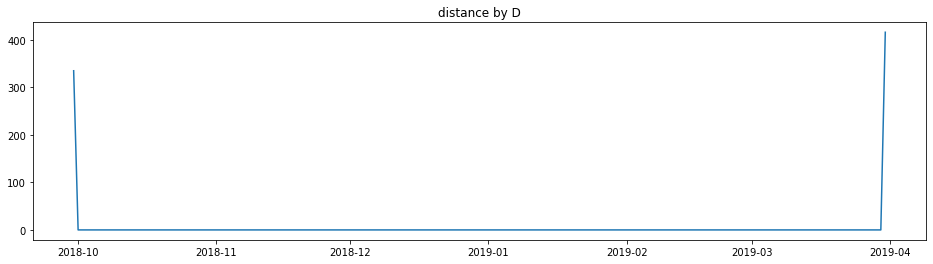

W
distance


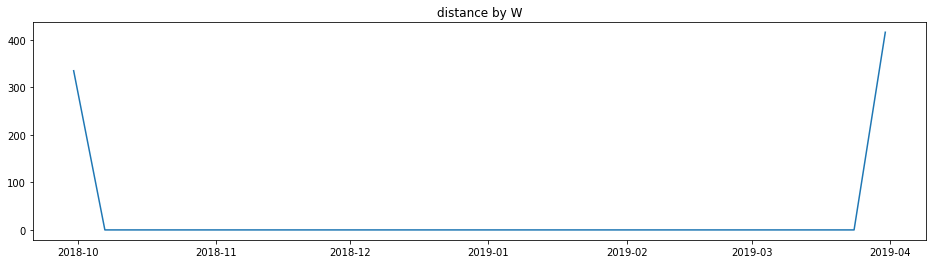

M
distance


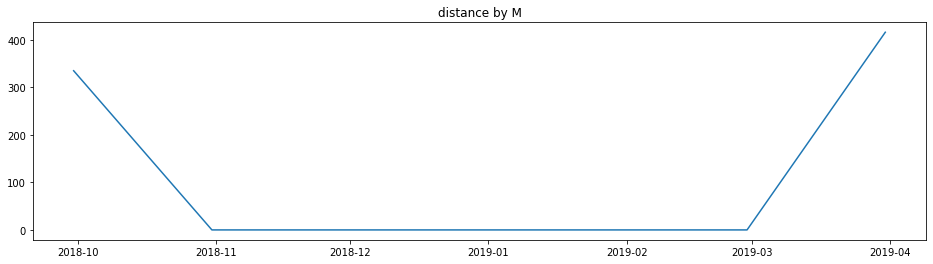

D
floors


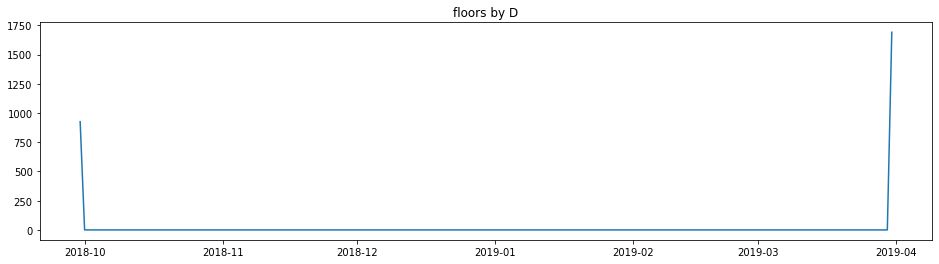

W
floors


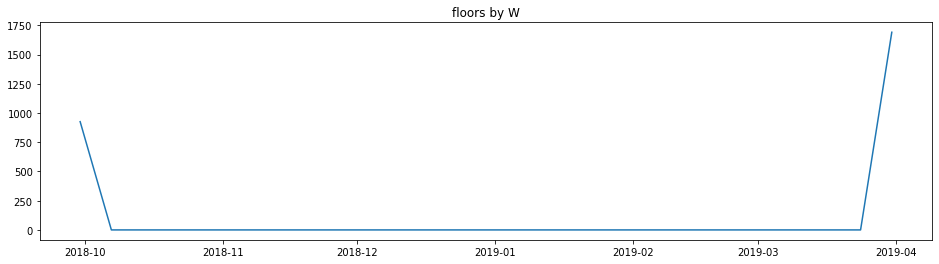

M
floors


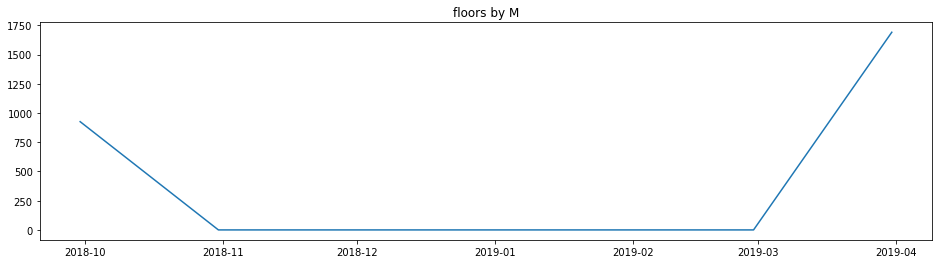

D
min_sed


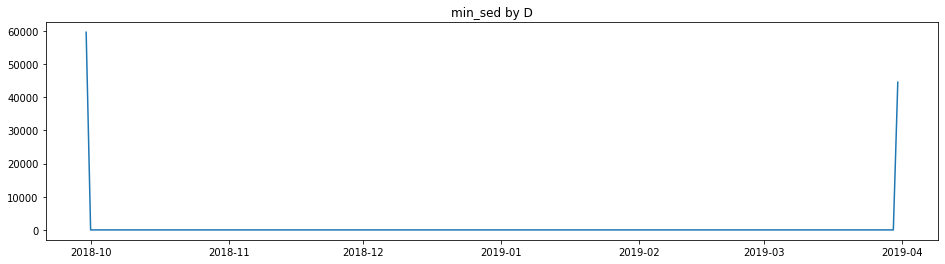

W
min_sed


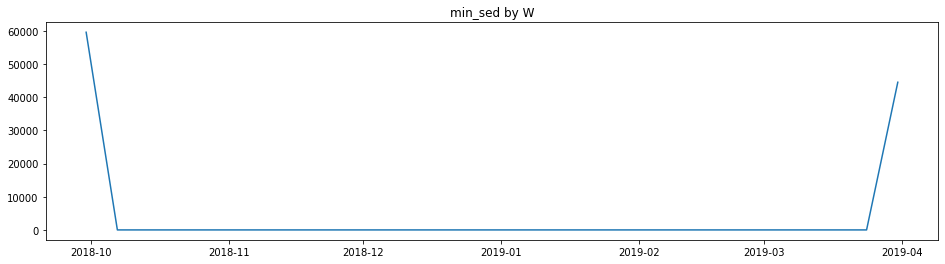

M
min_sed


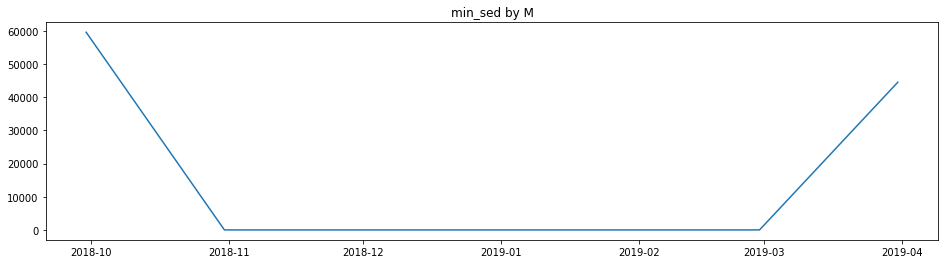

D
min_active_light


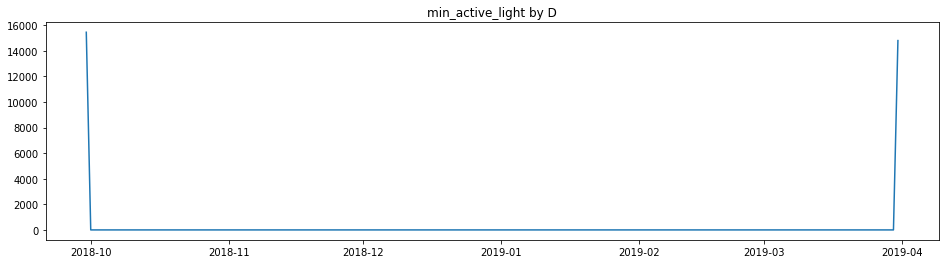

W
min_active_light


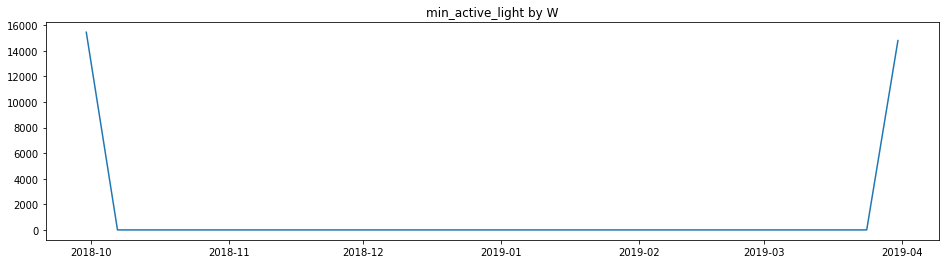

M
min_active_light


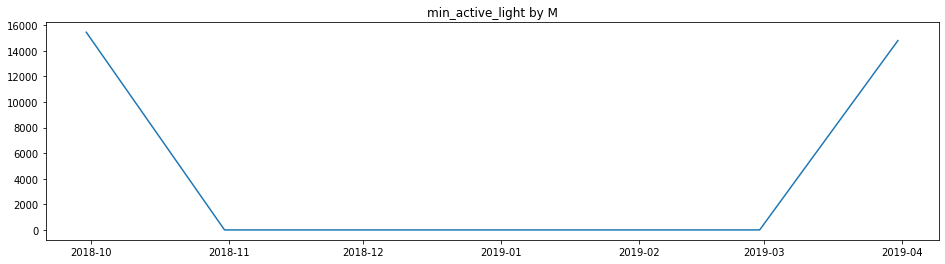

D
min_active_fairly


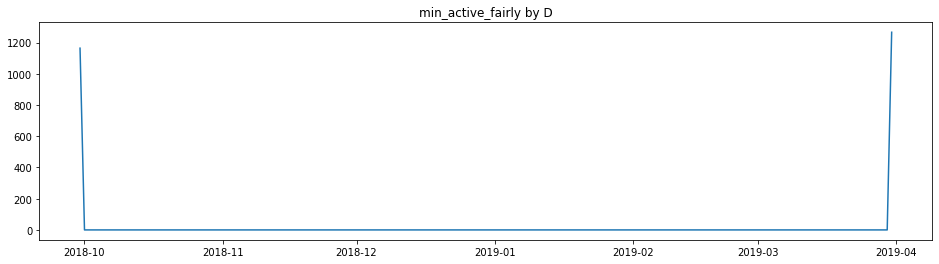

W
min_active_fairly


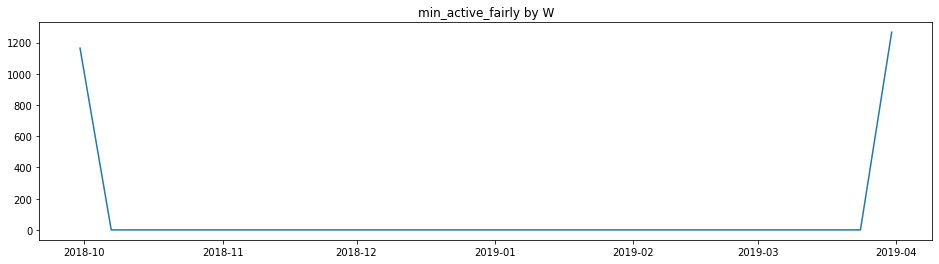

M
min_active_fairly


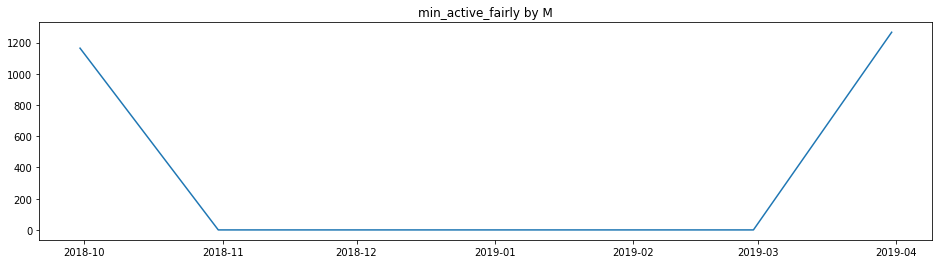

D
min_active_very


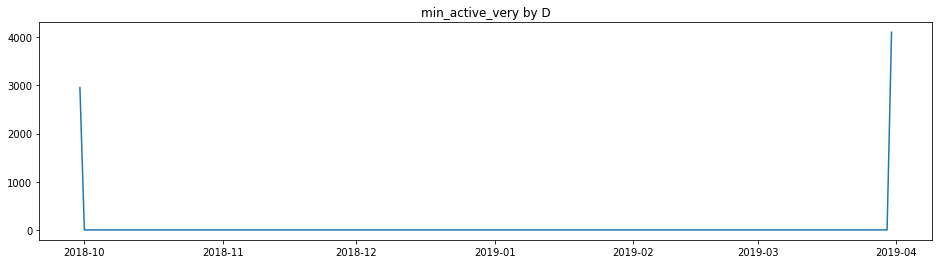

W
min_active_very


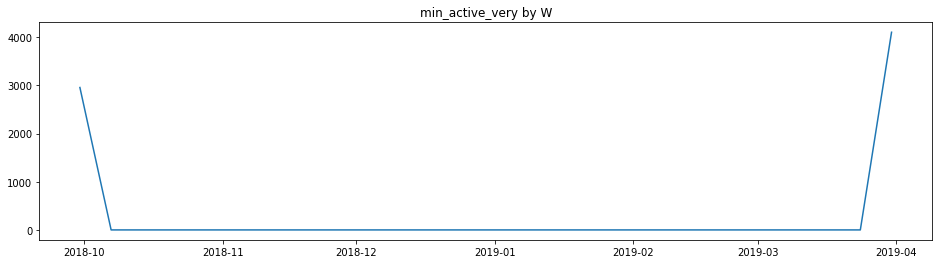

M
min_active_very


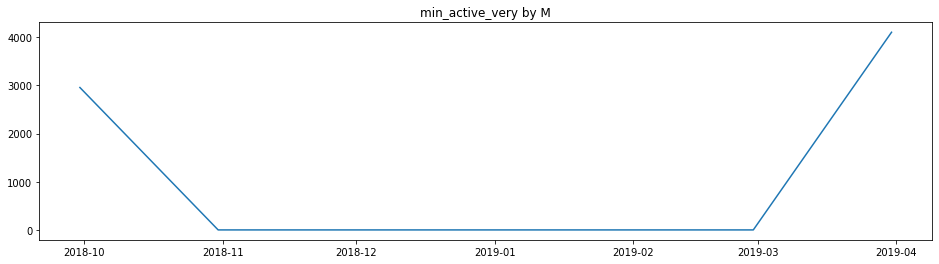

D
cal_activity


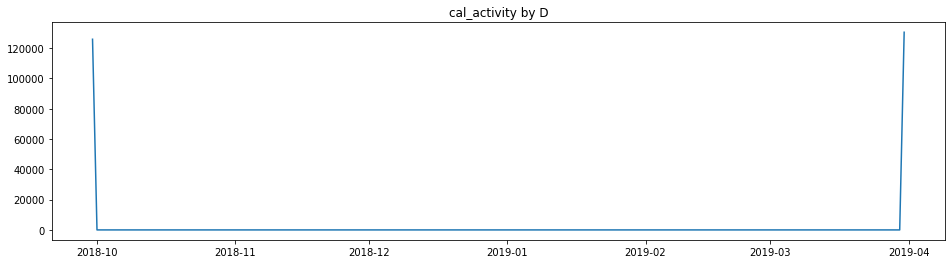

W
cal_activity


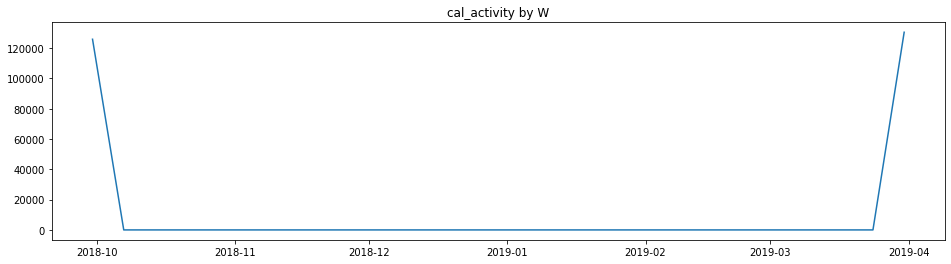

M
cal_activity


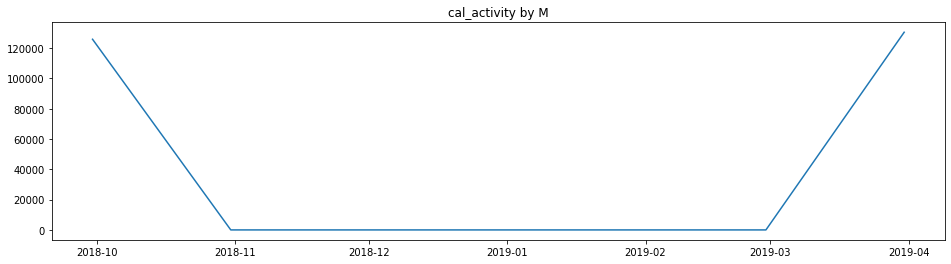

In [10]:
for var in target_vars:
    freqs = ['D','W','M']
#    freqs = {"D": "Daily", "W": "Weekly", "M": "Monthly", "A": "Annually"}
    for freq in freqs:
        print(freq)
        print(var)
        train = train.resample(freq)[target_vars].sum()
#         test = test.resample(freq)[target_vars].sum().reset_index()
        plt.figure(figsize=(16, 4))
        plt.plot(train[var])
#         plt.plot(test[var])    
        plt.title(var + ' by ' + freq)
        plt.show()

In [ ]:
# explore

In [ ]:
def prep_data(df: pd.DataFrame) -> pd.DataFrame:
    return (df.assign(ds=pd.to_datetime(df.Month_Invoiced)).sort_values('ds')
            .assign(y=df.Amount)\
            .groupby(['ds'])['y'].sum().reset_index().set_index('ds'))

In [ ]:
df = prep_data(df)

In [ ]:
def split_store_data(df, train_prop): 
    train_size = int(len(df) * train_prop)
    train, test = df[0:train_size].reset_index(), df[train_size:len(df)].reset_index()
    return train, test

In [ ]:
train, test = split_store_data(df2, train_prop=.80)

print('Observations: %d' % (len(df2)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

In [ ]:
train = train.set_index('ds')
test = test.set_index('ds')

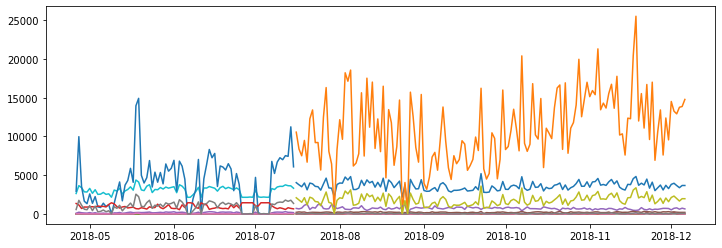

In [12]:
# peek data
plt.figure(figsize=(12, 4))
plt.plot(train)
plt.plot(test)

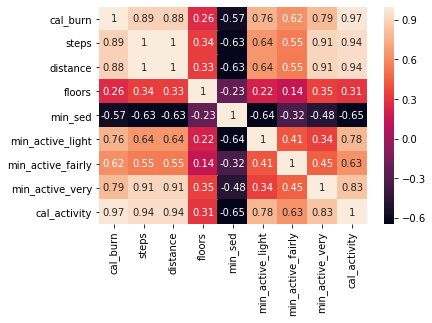

In [14]:
sns.heatmap(df.corr(), annot = True)

# Model

In [ ]:
def evaluate(target_var, train = train, test = test, output=True):
    mse = metrics.mean_squared_error(test[target_var], yhat[target_var])
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse

def plot_and_eval(target_vars, train = train, test = test, metric_fmt = '{:.2f}', linewidth = 4):
    if type(target_vars) is not list:
        target_vars = [target_vars]

    plt.figure(figsize=(16, 8))
    plt.plot(train[target_vars],label='Train')
    plt.plot(test[target_vars], label='Test')

    for var in target_vars:
        mse, rmse = evaluate(target_var = var, train = train, test = test, output=False)
        plt.plot(yhat[var], linewidth=linewidth)
        print(f'{var} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse))

    plt.show()

In [ ]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'metric', 'value'])
eval_df

In [ ]:
# create df to store MSE & RMSE
def append_eval_df(model_type, target_vars, train = train, test = test):
    temp_eval_df = pd.concat([pd.DataFrame([[model_type, i, 'mse', evaluate(target_var = i, 
                                                                            train = train, 
                                                                            test = test, 
                                                                            output=False)[0]],
                                            [model_type, i, 'rmse', evaluate(target_var = i, 
                                                                             train = train, 
                                                                             test = test, 
                                                                             output=False)[1]]],
                                           columns=['model_type', 'target_var', 'metric', 'value']) 
                              for i in target_vars], ignore_index=True)
    return eval_df.append(temp_eval_df, ignore_index=True)

In [ ]:
periods = 30
yhat['y'] = train.y.rolling(periods).mean().iloc[-1]

# plot_and_eval(target_vars, train, test)
# eval_df = append_eval_df(model_type='moving_average', target_vars=['y'], train = train, test = test)

plt.figure(figsize=(16, 8))
plt.plot(train[target_vars],label='Train')
plt.plot(test[target_vars], label='Test')
period_vals = [1, 4, 12, 26, 52, 104]
for p in period_vals:
    yhat['y'] = train.y.rolling(p).mean().iloc[-1]
    plt.plot(yhat.y)
    print('\nrolling averge period:',p)
    print('\nitem sales\n')
    evaluate('y', train = train, test = test)